In [1]:
import numpy as np
from quspin.operators import hamiltonian
from quspin.basis import spin_basis_1d
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
plt.rcParams['font.family'] = 'serif'

In [2]:
l = np.arange(2, 15, dtype=int)

s = np.linspace(0, 1, 51)
no_checks={"check_herm":False,"check_pcon":False,"check_symm":False}

In [3]:
num_instances = 50
gaps, gaps_std = [], []

for L in l:
    print(L, end=':  ')
    # basis_sym = spin_basis_1d(L, zblock=-1 if L % 2 == 1 else 1)
    L = int(L)
    basis_nosym = spin_basis_1d(L)
    gap = []
    for k in range(num_instances):
        print(k, end=', ')

        # # Random interactions on a full graph
        # J = np.random.rand(L, L) * 2 - 1
        # J = np.triu(J, 1)
        # J = J / np.max(np.abs(J))
        # d = []
        # for i in range(L):
        #     for j in range(i+1, L):
        #         d += [[J[i,j], i, j]]

        # Random interactions on a chain with PBC
        J = np.random.rand(L) * 2 - 1
        d = [[J[i], i, (i+1)%L] for i in range(L)]

        # eigvals_sym = np.zeros((2**(L-1), len(s)))
        # eigvals_nosym = np.zeros((2**(L), len(s)))
        eigvals = np.zeros((3, len(s)))
        for i in range(len(s)):
            Jzz = [[s[i] * d[j][0], d[j][1], d[j][2]] for j in range(len(d))]
            Jx = [[(1-s[i]), j] for j in range(L)]
            static = [['zz', Jzz], ['x', Jx]]
            dynamic = []
            # H_sym = hamiltonian(static, dynamic, basis=basis_sym, dtype=np.float64, **no_checks)
            H_nosym = hamiltonian(static, dynamic, basis=basis_nosym, dtype=np.float64, **no_checks)
            if L == 2:
                E_nosym = H_nosym.eigvalsh()[:3]
            else:
                E_nosym = H_nosym.eigsh(k=3, which='SA')[0] # Algebraically smallest two eigenvalues
            eigvals[:,i] = E_nosym

            # E_nosym = H_nosym.eigvalsh() # full spectrum
            # eigvals_nosym[:,i] = E_nosym
            # E_sym = H_sym.eigvalsh() # full spectrum
            # eigvals_sym[:,i] = E_sym

        gap += [np.min(eigvals[2] - eigvals[0])]
    
    print()
    gaps += [np.average(gap)]
    gaps_std += [np.std(gap)]

2:  0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 
3:  0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 
4:  0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 
5:  0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 
6:  0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 
7:  0, 1, 2, 3, 4, 5, 6, 

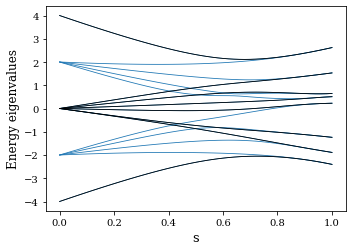

In [44]:
plt.close()
fig, ax = plt.subplots(figsize=(5, 3.6))

# for i in range(len(eigvals_nosym)):
#     ax.plot(s, eigvals_nosym[i], 'C0-', lw=0.8)

# for i in range(len(eigvals_sym)):
#     ax.plot(s, eigvals_sym[i], 'k-', lw=0.8)

ax.set_xlabel('s', fontsize=13)
ax.set_ylabel('Energy eigenvalues', fontsize=12)
fig.tight_layout()
# plt.savefig(os.path.join('plots', 'eigval_repulsion_full.png'), dpi=400)

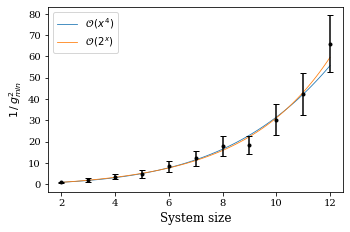

In [68]:
plt.close()
fig, ax = plt.subplots(figsize=(5.3, 3.4))
# z = [gaps[i] if l[i]!=8 else gaps[i]*1. for i in range(len(gaps))]
z = gaps
g2 = np.array(z)**2

ll = np.linspace(np.min(l), np.max(l), 100)

fit2 = lambda x, a, b, c: a*x**4+b*x**2+c
fitn = lambda x, a, b, c: a*2**(b*x)+c
par2, _ = curve_fit(fit2, xdata=l, ydata=1/g2, sigma=1/g2**1.2*np.array(gaps_std))
parn, _ = curve_fit(fitn, xdata=l, ydata=1/g2, sigma=1/g2**1.2*np.array(gaps_std))
y2 = fit2(ll, *par2)
yn = fitn(ll, *parn)
ax.plot(ll, y2, '-', lw=0.8, label='$\mathcal{O}\, (x^4)$')
ax.plot(ll, yn, '-', lw=0.8, label='$\mathcal{O}\, (2^x)$')

ax.errorbar(l, 1/g2, yerr=1/g2**1.2*np.array(gaps_std), color='k', capsize=3, marker='.', linestyle='')
ax.set_xlabel('System size', fontsize=12)
ax.set_ylabel(r'$1\, /\, g_{min}^2$', fontsize=11)
ax.legend(fontsize=10)
# plt.savefig(os.path.join('plots', 'mingap.png'), dpi=400)